D:\anaconda\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


hello


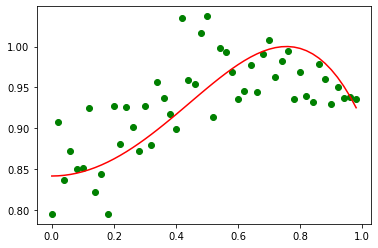

In [1]:
import numpy as np

import math
import matplotlib.pyplot as plt
from scipy import linalg
from scipy import stats

print("hello")

def origin_data():
    x = np.arange(0, 1, 0.02)
    y = np.sin(x*x + 1)
    return x, y

def add_noise(mu, sigma, y):
    y_noise = np.random.normal(mu, sigma, len(y))
    y = y + y_noise
    return y

x, y = origin_data()
y_origin = y
y_noise = add_noise(0, 0.04, y)
plt.plot(x, y_noise, 'go')
plt.plot(x, y, 'red')

Estimated w is:  [0.00361053 0.06335446 0.32576926 0.38650647 0.24091032 0.52307531
 0.29721049 0.44902163 0.28401568 0.04999078]


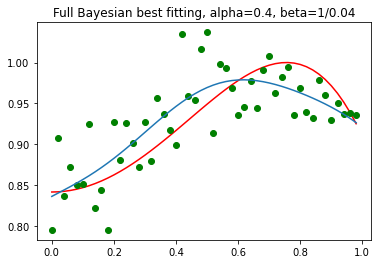

In [2]:
# Full Bayesian

def basis_function_gaussian_single(x, mu, sigma):
    g = math.exp(-(x - mu) ** 2 / (2 * sigma ** 2))
    return g

def basis_function_sigmoid(x, mu, sigma):
    fi = (x - mu) / sigma
    s = 1 / (1 + np.exp(-fi))
    return s

def Full_Bayesian_basis(x, y, M, mu, sigma, alpha, beta):
    N = len(x)
    X = np.zeros([N, M])
    t = y.T
    y_fitting = np.zeros([N])
    for i in range(0, N):
        for j in range(0, M):
            # mu = 0.05m, sigma = 1
            X[i][j] = basis_function_gaussian_single(x[i], -M/3 * mu + mu * j, sigma)
#             X[i][j] = basis_function_poly(x[i], j)
#             X[i][j] = basis_function_sigmoid(x[i], mu * j, sigma)

    square = np.dot(X.T, X)
    Map = beta * square + alpha * np.eye(M, M)
    inverse = np.linalg.inv(Map)
    w_ = np.dot(inverse, X.T) * beta
    W = np.dot(w_, t)
    y_fitting = np.dot(X, W)
    
    return y_fitting, W

def Full_Bayesian_basis_plot(x, y_origin, y_noise, M):
    # mu, sigma of basis function
    mu = 0.3
    sigma = 0.3
    
    # alpha -- error of p(w)
    # beta -- precision of p(t|w)
    alpha = 0.4
    beta = 1/0.04
    y_fitting, w = Full_Bayesian_basis(x, y_noise, M, mu, sigma, alpha, beta)

    plt.plot(x, y_origin, 'red')
    # plt.plot(x, y, 'ro') 
    plt.plot(x, y_noise, 'go')
    plt.plot(x, y_fitting)
    return y_fitting, w

Y_FULL, W_FULL = Full_Bayesian_basis_plot(x, y, y_noise, 10)
plt.title("Full Bayesian best fitting, alpha=0.4, beta=1/0.04")

print("Estimated w is: ", W_FULL)

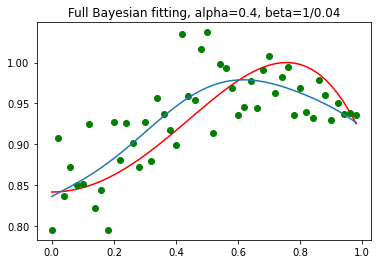

Estimated w is:  [0.00361053 0.06335446 0.32576926 0.38650647 0.24091032 0.52307531
 0.29721049 0.44902163 0.28401568 0.04999078]
Estimated w is:  [0.00074383 0.01447992 0.10608363 0.30128969 0.3816165  0.3750405
 0.44156673 0.32925532 0.10514525 0.01312589]
Estimated w is:  [0.00361053 0.06335446 0.32576926 0.38650647 0.24091032 0.52307531
 0.29721049 0.44902163 0.28401568 0.04999078]
Estimated w is:  [0.00074383 0.01447992 0.10608363 0.30128969 0.3816165  0.3750405
 0.44156673 0.32925532 0.10514525 0.01312589]
Estimated w is:  [-0.07694332 -0.43940058  0.22538311  0.6593125  -0.06957043  0.86150288
 -0.09481453  0.92849867 -0.22018959 -0.05251453]


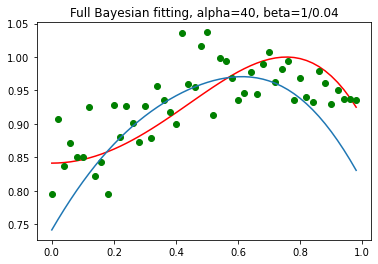

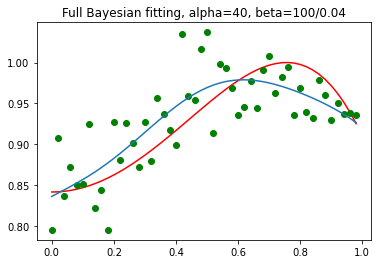

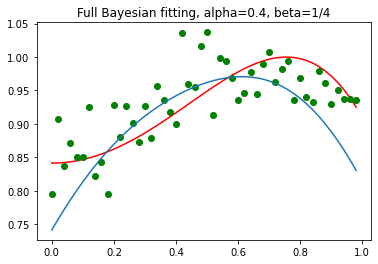

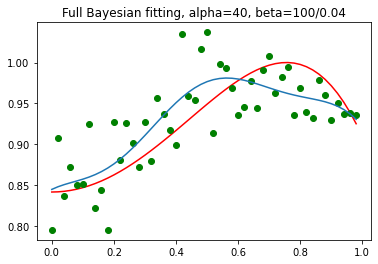

In [3]:
# Experiments with changing alpha and beta

# 1/alpha is square of sigma of p(w), the bigger alpha is, the more uncertainty the w has but more precise the w is.
def Full_Bayesian_basis_plot(x, y_origin, y_noise, M, alpha, beta):
    # mu, sigma of basis function
    mu = 0.3
    sigma = 0.3   
    # alpha -- error of p(w)
    # beta -- precision of p(t|w)
    y_fitting, w = Full_Bayesian_basis(x, y_noise, M, mu, sigma, alpha, beta)

    plt.plot(x, y_origin, 'red')
    # plt.plot(x, y, 'ro') 
    plt.plot(x, y_noise, 'go')
    plt.plot(x, y_fitting)
    return y_fitting, w

Y_FULL, W_FULL = Full_Bayesian_basis_plot(x, y, y_noise, 10, 0.4, 1/0.04)
plt.title("Full Bayesian fitting, alpha=0.4, beta=1/0.04")
plt.show()
print("Estimated w is: ", W_FULL)

Y_FULL, W_FULL = Full_Bayesian_basis_plot(x, y, y_noise, 10, 40, 1/0.04)
plt.title("Full Bayesian fitting, alpha=40, beta=1/0.04")
plt.show()
print("Estimated w is: ", W_FULL)

Y_FULL, W_FULL = Full_Bayesian_basis_plot(x, y, y_noise, 10, 40, 100/0.04)
plt.title("Full Bayesian fitting, alpha=40, beta=100/0.04")
plt.show()
print("Estimated w is: ", W_FULL)

Y_FULL, W_FULL = Full_Bayesian_basis_plot(x, y, y_noise, 10, 0.4, 1/4)
plt.title("Full Bayesian fitting, alpha=0.4, beta=1/4")
plt.show()
print("Estimated w is: ", W_FULL)

Y_FULL, W_FULL = Full_Bayesian_basis_plot(x, y, y_noise, 10, 0.4, 100/0.04)
plt.title("Full Bayesian fitting, alpha=40, beta=100/0.04")
plt.show()
print("Estimated w is: ", W_FULL)


In [4]:

3. Discuss the meaning of them with respect to the curve fitting results.
    For the curve fitting result, alpha and beta can not affect the curve separately， while alpha/beta will decide the shape of 
fitting curve. If the alpha/beta is too large, then there will be underfitting situation, because np.dot(X.T,X)+alpha/beta*I this term
will be close to identical matrix which means MAP or full bayesian estimation effect is close to zero. 
    The alpha*I is covariance matrix of prior p(w) and the beta is precision of MLE.


SyntaxError: invalid syntax (379031801.py, line 1)

In [ ]:
# Predictive distribution
import random

def Predictive_distribution(x, y, M, mu, sigma, alpha, beta):
    x, y = origin_data()
    N = len(x)
    t = np.zeros([N])
    

    x_s = np.zeros([N])
    seq = random.sample(range(50), 50)
    
    for i in range(50):
        t[i] = y_noise[seq[i]]
        x_s[i] = x[seq[i]]

    X = np.zeros([N, M])
    # M*1
    Mn = np.zeros([M, 1])
    # M*M
    Sn = alpha * np.eye(M, M)
    Sn_old = Sn
    # N*1
    M_new = np.zeros([N, N])
    # N*1
    S_new = np.zeros([N, N])
    
    for i in range(0, N):
        for j in range(0, M):
            # mu = 0.05m, sigma = 1
            X[i][j] = basis_function_gaussian_single(x_s[i], -M/3 * mu + mu * j, sigma)
    #             X[i][j] = basis_function_poly(x[i], j)
    #             X[i][j] = basis_function_sigmoid(x[i], mu * j, sigma)
    
    for i in range(0, N):

        input_x = x_s[:i+1]
        input_t = t[:i+1]
        input_seq = seq[:i+1]
        

        # Fi : i*M
        Fi = X[:i+1]

        # Sn : M*M = M*M + M*i X i*M
        Sn_old = Sn
        Sn = Sn + beta * np.dot(Fi.T,Fi)

        # Mn : M*1 = M*M X (M*M X M*1 + M*i X i*1)
        Sn_inv = np.linalg.inv(Sn)

        Mnn = np.dot(Sn_old, Mn) + beta * np.dot(Fi.T, input_t).reshape(M, 1) 
        Mn = np.dot(Sn_inv, Mnn)

        # 1*M X M*N
        M_new = np.dot(Mn.T, X.T).reshape(N, 1)
        
        Fi_square = np.dot(X, np.linalg.inv(Sn))
        Fi_square = np.dot(Fi_square, X.T)
        
        S_new = 1/beta + np.diag(Fi_square)
        S_new = S_new.reshape(N, 1)
        up_threshold = M_new + S_new
        down_threshold = M_new - S_new

        S_sigma = np.sqrt(S_new)
        
        
        plt.plot(x, y, 'red')
        plt.plot(x, y, 'ro')
        plt.plot(input_x, input_t, 'go') 
        plt.plot(x_s, M_new, 'bo')
        for i in range(50):
            plt.errorbar(x_s[i], M_new[i], np.sqrt(S_new[i]), fmt='b')

        plt.show()
        print(input_seq)
        print(len(input_seq))
    
    return M_new, Mn

M_new, Mn = Predictive_distribution(x, y_origin, 10, 0.3, 0.3, 0.1, 1/0.04)


In [ ]:
Question 8: Explain why the predictive distribution is better than the original form of the full Bayesian inference.
    The full Bayesian inference can find the best fitting curve for training data but it has nothing to do with future or the trend of 
the dataset. In that case, we can only know the value of y of existing x.
    However, in reality, in most circumstance we need to know the y value of future x. The predictive distibution provides distribution 
of y value for all x, which means we can get the predictive y value of any x. Besides, predictive distribution also provides the maen
and covariance for the prediction like the figure shown above.

Question 9:     
    Discuss the differences between p(t_new|t) and p(w|t).
    p(t_new|t) is the probability distribution of every new point t given by all previous points t_bar. It is a probability for one
point. The mean, covariance and uncertinty is for the prediction of one point. To maximum it is to find the most possible value of 
new point t given by previous distribution.
    p(w|t) is probability of correctness of the predicted w. It is like a metrics for the weight W of fitting curve. The mean, 
covariance is for correctness of fitting. To maximum it is to find the best W that can fit the existing points. It is to find the best 
fitting distribution.
    And the p(t_new|t) is for future points and p(w|t) is for existing points.
